In [6]:
import numpy as np
import matplotlib.pyplot as plt

from src.raytracing.cpu import parrilla_adapted_cpu

In [7]:
# Speed:
c1 = 5.9
c2 = 3.2
c3 = 1.483

xmin = -12
xmax = 12
xstep = 1e-2
x = np.arange(xmin, xmax + xstep, xstep)

# Emitters:
xA_vec = [2.5]
zA_vec = [0]

# Focuses:
XX, ZZ = np.meshgrid(
    np.linspace(-10, -5, 10, dtype=np.float32),
    np.linspace(15, 25, 10, dtype=np.float32)
)

xF_vec, zF_vec = XX.ravel(), ZZ.ravel()

In [8]:
# Running on CPU:
x1 = x
x2 = x

xdiscr = [x1, x2]
N = [len(xi) for xi in [x1, x2]]

t1 = lambda x0: np.interp(x0, x1, x1)
t2 = lambda x0: np.interp(x0, x2, x2)

f1 = lambda x0: x0 * .05 + 5
f2 = lambda x0: x0 * 0 + 10

x = [t1, t2]
z = [f1, f2]
c = [c1, c2, c3]
M = len(x)

Nt, Nf = len(xA_vec), len(xF_vec)
solutions_cpu, elapsed_time_cpu = parrilla_adapted_cpu(x, z, xA_vec, zA_vec, xF_vec, zF_vec, c)

In [9]:
# Running on GPU:
elapsed_time_gpu = -1e-3

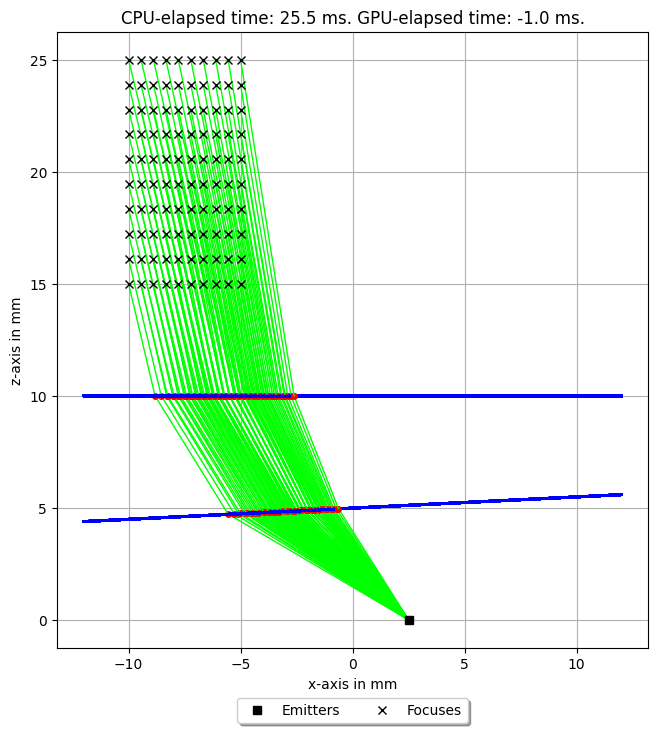

In [10]:
# Plot rays:
tof = 0
plt.figure(figsize=(12,8))
for t in range(Nt):
    for f in range(Nf):
        solution = solutions_cpu[t * Nf + f]
        k = solution['result']
        elapsed_time = solution['elapsed_time']
        xA, zA = xA_vec[t], zA_vec[t]
        xF, zF = xF_vec[f], zF_vec[f]

        linewidth = 1
        for i in range(M + 1):
            if i == 0:
                plt.plot([xA, x[i](k[0])], [zA, z[i](k[0])], color='lime', linewidth=linewidth)
                tof += np.sqrt((xA - x[i](k[0]))**2 + (zA - z[i](k[0]))**2)/c[0]
            elif i == M:
                plt.plot([xF, x[i - 1](k[i - 1])], [zF, z[i - 1](k[i - 1])], color='lime', linewidth=linewidth)
                tof += np.sqrt((xF - x[i-1](k[i-1])) ** 2 + (zF - z[i-1](k[i-1])) ** 2) / c[-1]
            else:
                plt.plot([x[i](k[i]), x[i - 1](k[i - 1])], [z[i](k[i]), z[i - 1](k[i - 1])], color='lime', linewidth=linewidth)
                tof += np.sqrt((x[i](k[i]) - x[i - 1](k[i - 1])) ** 2 + (x[i](k[i]) - z[i - 1](k[i - 1])) ** 2) / c[i]
            if i <= M - 1:
                # Ploting surfaces
                plt.plot(x[i](xdiscr[i]), z[i](xdiscr[i]), 'o-', color="b", alpha=.5, markersize=1)
                plt.plot(x[i](k[i]), z[i](k[i]), 'o', color="r", markersize=4)
plt.title(f"CPU-elapsed time: {elapsed_time_cpu * 1000:.1f} ms. GPU-elapsed time: {elapsed_time_gpu * 1000:.1f} ms.")

# Emitter:
plt.plot(xA_vec, zA_vec, 'sk', label="Emitters")

# Focus:
plt.plot(xF_vec, zF_vec, 'xk', label="Focuses")

plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=5)
plt.xlabel("x-axis in mm")
plt.ylabel("z-axis in mm")
plt.gca().set_aspect("equal")
plt.grid()